In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from itertools import cycle, islice
! pip install rfpimp
from rfpimp import *

In [2]:
data = pd.read_csv('/content/drive/My Drive/ACM SUMMER WORKSHOP/PROJECT NOTEBOOKS & DATA/Extremist_Users/Final Data csv/Finals/Best_Ever_Dataset.csv')

In [3]:
data.drop(columns= ['Unnamed: 0'], axis=1, inplace=True)

In [4]:
senti = {'positive':1, 'neutral':0, 'negative':-1}
data['sentiment'] = data['sentiment'].map(senti)

In [5]:
data.head()

,user_id,avg_time_difference,avg_time_difference_in_min,avg_time_difference_in_hours,followers_count,retweet_count,sentiment_score,sentiment,extreme_user
0,13508182,0 days 16:50:12.000000000,1010.20,16.837,147919,1,3,1,0
1,14458945,0 days 01:22:35.000000000,82.58,1.376,282,0,4,1,1
2,16263847,0 days 13:11:17.000000000,791.28,13.188,2613,1147,2,1,0
3,16804541,0 days 11:39:55.500000000,699.92,11.665,12203,9,1,1,0
4,16863403,0 days 13:34:30.000000000,814.50,13.575,664,1597,0,0,0


In [18]:
features = ['avg_time_difference_in_min', 'followers_count', 'retweet_count','sentiment_score', 'sentiment']

In [19]:
x= data[features] # Features
y= data.extreme_user

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

## **K-Means**

In [123]:
df = StandardScaler().fit_transform(x)
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
model = kmeans.fit(df)
centers = model.cluster_centers_
pred = kmeans.predict(df)

#Precision =   0.0
#Accuracy =  0.5761107064821559

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df)
kmeans.fit(x_scaled)
pred2 = kmeans.predict(x_scaled)
print("Accuracy = ",metrics.accuracy_score(data['extreme_user'],pred2))
print("Precision = ",metrics.precision_score(data['extreme_user'],pred2))



Accuracy =  0.5024581209031318
Precision =  0.4173806609547124


## **Logistic Regression**

In [54]:
reg= LogisticRegression()

In [57]:
reg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_predicted=reg.predict(x_test)

In [59]:
acc_log = round(reg.score(x_train,y_train) * 100, 2)
acc_log

57.8

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

Accuracy: 0.5719053398058253
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
scores_1 = cross_val_score(reg, x_train, y_train, cv=10, scoring = "accuracy")
scores_1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIS

array([0.5786736 , 0.5786736 , 0.5786736 , 0.55136541, 0.50975293,
       0.57737321, 0.47724317, 0.50195059, 0.578125  , 0.578125  ])

In [62]:
confusion_matrix= metrics.confusion_matrix(y_test, y_predicted)
confusion_matrix

array([[1885,    0],
       [1411,    0]])

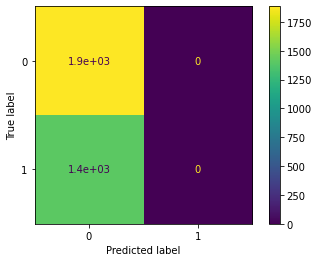

In [63]:
plot_confusion_matrix(reg, x_test, y_test)

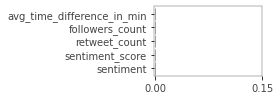

In [64]:
imp = importances(reg, x_train, y_train) # permutation
viz = plot_importances(imp)
viz.view()

## **Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

In [ ]:
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train)  
yy_predicted = dt.predict(x_test)  
acc_decision_tree = round(dt.score(x_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, yy_predicted))
print("Precision:",metrics.precision_score(y_test, yy_predicted))
print("Recall:",metrics.recall_score(y_test, yy_predicted))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
scores_2 = cross_val_score(dt, x_train, y_train, cv=10, scoring = "accuracy")
scores_2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

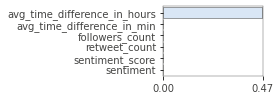

In [ ]:
imp = importances(dt, x_train, y_train) # permutation
viz = plot_importances(imp)
viz.view()